In [0]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.model_selection import cross_val_score, cross_validate, KFold, LeaveOneOut, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt

##### Функция построения графиков

In [0]:
def GraphBuilder(ArrX,ArrY,Title,LabelX,LabelY):
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    plt.plot(ArrX, ArrY)
    plt.grid(True)
    plt.title(Title, fontsize=16)
    plt.ylabel(LabelY, fontsize=12)
    plt.xlabel(LabelX, fontsize=12)
    plt.show()

##### Функция решётчатого поиска с перекрёстной проверкой

In [0]:
def RegGridSearchCV(model, NEstimatorsTP, dataParam, dataAnsw):
    MAEList = []
    MSEList = []
    R2SList = []
    for param in NEstimatorsTP:
        ModelGS = model(n_estimators=param, random_state = 0)
        MAEList.append(abs(cross_val_score(ModelGS, dataParam, dataAnsw, cv =10, scoring='neg_mean_absolute_error').mean()))
        MSEList.append(abs(cross_val_score(ModelGS, dataParam, dataAnsw, cv =10, scoring='neg_mean_squared_error').mean()))
        R2SList.append(abs(cross_val_score(ModelGS, dataParam, dataAnsw, cv =10, scoring='r2').mean()))
    return MAEList, MSEList, R2SList

In [4]:
url ='https://raw.githubusercontent.com/NastjaK666/uni/master/diabetes.csv'
data = pd.read_csv(url)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
DataParam = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age','DiabetesPedigreeFunction']]
DataAnsw = data['Outcome']
data.shape

(768, 9)

In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [0]:
TrainX,TestX,TrainY,TestY = train_test_split(DataParam,DataAnsw, test_size=0.3, random_state = 1)

## Случайный лес.

In [8]:
RandForest5 = RandomForestRegressor(n_estimators=5)
RandForest5.fit(TrainX,TrainY)
RFPredict5 = RandForest5.predict(TestX)
print("Средняя абсолютная ошибка:\t",round(mean_absolute_error(TestY, RFPredict5),6))
print("Средняя квадратичная ошибка:\t",round(mean_squared_error(TestY, RFPredict5),6))
print("Коэффициент детерминации:\t",round(r2_score(TestY, RFPredict5),6))

Средняя абсолютная ошибка:	 0.290909
Средняя квадратичная ошибка:	 0.166926
Коэффициент детерминации:	 0.282243


In [0]:
RFNEstimatorsTP = range(1,101)
RFMAEList,RFMSEList,RFR2SList = RegGridSearchCV(RandomForestRegressor,RFNEstimatorsTP,DataParam,DataAnsw)

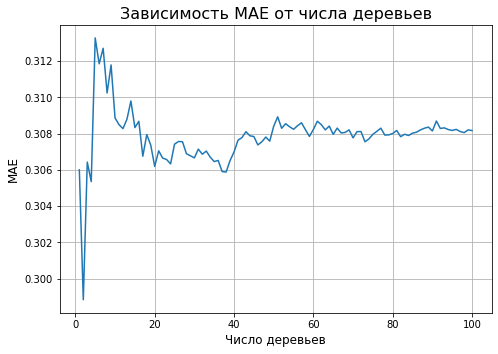

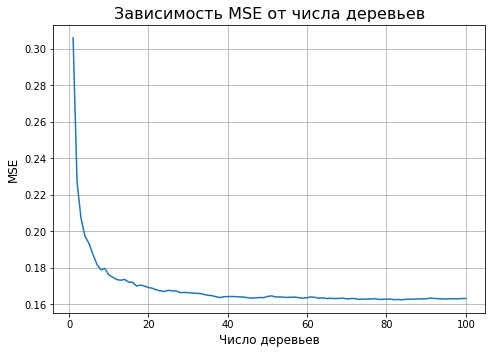

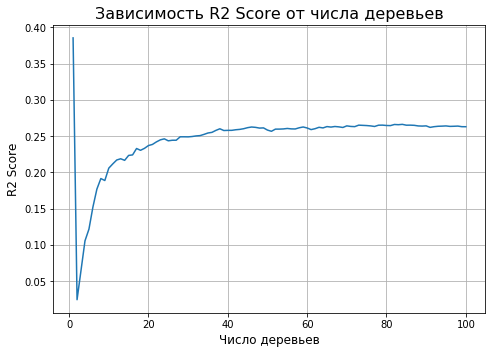

In [10]:
GraphBuilder(RFNEstimatorsTP, RFMAEList,'Зависимость MAE от числа деревьев','Число деревьев','MAE')
GraphBuilder(RFNEstimatorsTP, RFMSEList,'Зависимость MSE от числа деревьев','Число деревьев','MSE')
GraphBuilder(RFNEstimatorsTP, RFR2SList,'Зависимость R2 Score от числа деревьев','Число деревьев','R2 Score')

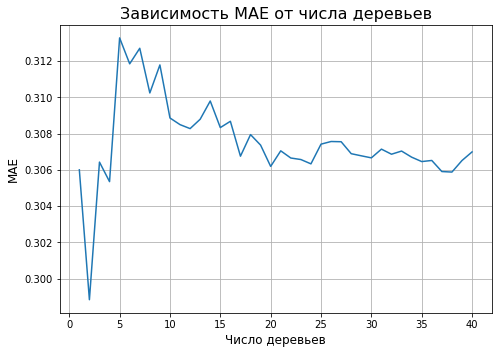

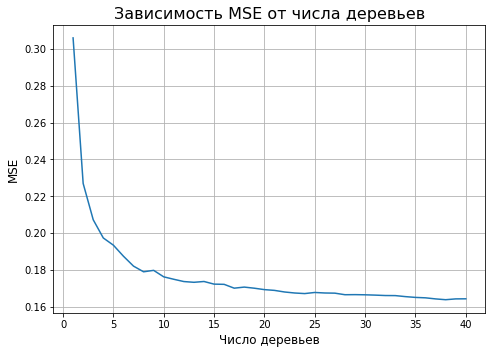

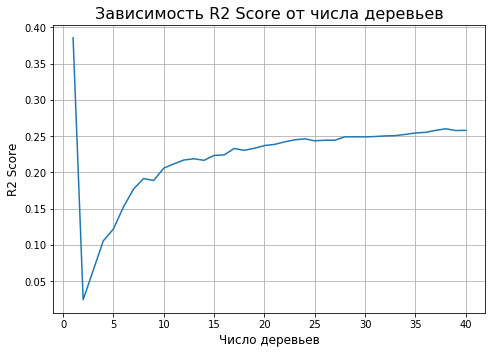

In [21]:
GraphBuilder(RFNEstimatorsTP[0:40], RFMAEList[0:40],'Зависимость MAE от числа деревьев','Число деревьев','MAE')
GraphBuilder(RFNEstimatorsTP[0:40], RFMSEList[0:40],'Зависимость MSE от числа деревьев','Число деревьев','MSE')
GraphBuilder(RFNEstimatorsTP[0:40], RFR2SList[0:40],'Зависимость R2 Score от числа деревьев','Число деревьев','R2 Score')

In [23]:
RandForestBP = RandomForestRegressor(n_estimators=2)
RandForestBP.fit(TrainX,TrainY)
RFPredictBP = RandForestBP.predict(TestX)
print("Средняя абсолютная ошибка:\t",round(mean_absolute_error(TestY, RFPredictBP),6))
print("Средняя квадратичная ошибка:\t",round(mean_squared_error(TestY, RFPredictBP),6))
print("Коэффициент детерминации:\t",round(r2_score(TestY, RFPredictBP),6))

Средняя абсолютная ошибка:	 0.255411
Средняя квадратичная ошибка:	 0.183983
Коэффициент детерминации:	 0.208904


## Градиентный бустинг.

In [12]:
GradBoost5 = GradientBoostingRegressor(n_estimators=20)
GradBoost5.fit(TrainX,TrainY)
GBPredict5 = GradBoost5.predict(TestX)
print("Средняя абсолютная ошибка:\t",round(mean_absolute_error(TestY, GBPredict5),6))
print("Средняя квадратичная ошибка:\t",round(mean_squared_error(TestY, GBPredict5),6))
print("Коэффициент детерминации:\t",round(r2_score(TestY, GBPredict5),6))

Средняя абсолютная ошибка:	 0.323558
Средняя квадратичная ошибка:	 0.147608
Коэффициент детерминации:	 0.365311


In [0]:
GBNEstimatorsTP = range(1,101)
GBMAEList,GBMSEList,GBR2SList = RegGridSearchCV(GradientBoostingRegressor,RFNEstimatorsTP,DataParam,DataAnsw)

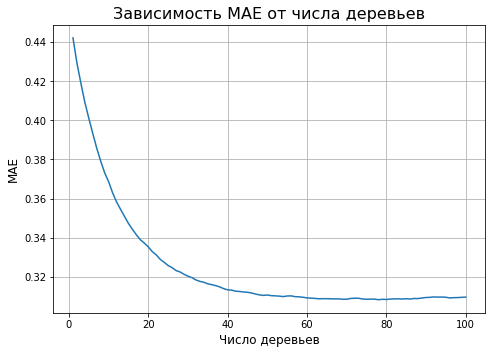

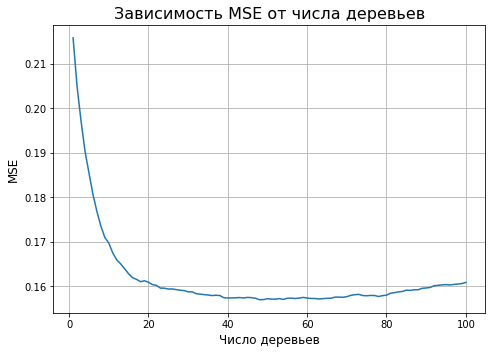

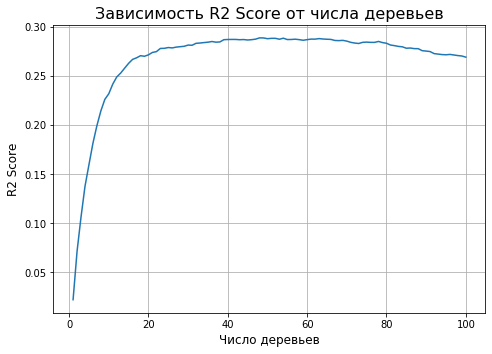

In [14]:
GraphBuilder(GBNEstimatorsTP, GBMAEList,'Зависимость MAE от числа деревьев','Число деревьев','MAE')
GraphBuilder(GBNEstimatorsTP, GBMSEList,'Зависимость MSE от числа деревьев','Число деревьев','MSE')
GraphBuilder(GBNEstimatorsTP, GBR2SList,'Зависимость R2 Score от числа деревьев','Число деревьев','R2 Score')

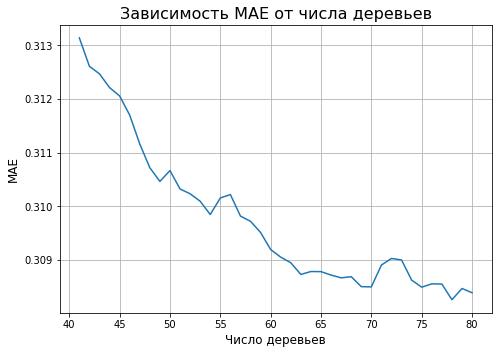

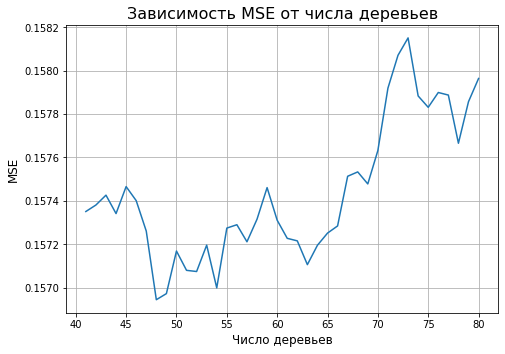

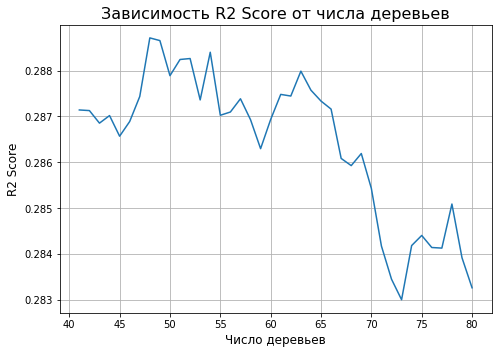

In [19]:
GraphBuilder(GBNEstimatorsTP[40:80], GBMAEList[40:80],'Зависимость MAE от числа деревьев','Число деревьев','MAE')
GraphBuilder(GBNEstimatorsTP[40:80], GBMSEList[40:80],'Зависимость MSE от числа деревьев','Число деревьев','MSE')
GraphBuilder(GBNEstimatorsTP[40:80], GBR2SList[40:80],'Зависимость R2 Score от числа деревьев','Число деревьев','R2 Score')

In [28]:
GradBoostBP = GradientBoostingRegressor(n_estimators=77)
GradBoostBP.fit(TrainX,TrainY)
GBPredictBP = GradBoostBP.predict(TestX)
print("Средняя абсолютная ошибка:\t",round(mean_absolute_error(TestY, GBPredictBP),6))
print("Средняя квадратичная ошибка:\t",round(mean_squared_error(TestY, GBPredictBP),6))
print("Коэффициент детерминации:\t",round(r2_score(TestY, GBPredictBP),6))

Средняя абсолютная ошибка:	 0.299884
Средняя квадратичная ошибка:	 0.14847
Коэффициент детерминации:	 0.361601
